# Data Mining Project - Team 7
## Telco Customer Churn Classification

# Reading and exploring the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd '/content/drive/MyDrive/data_mining_project'

/content/drive/MyDrive/data_mining_project


In [ ]:
%ls

data_mining_project_team_7.ipynb  dataset/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 7)
pd.set_option('display.max_columns', None)

In [4]:
# reading the dataset
data_ = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


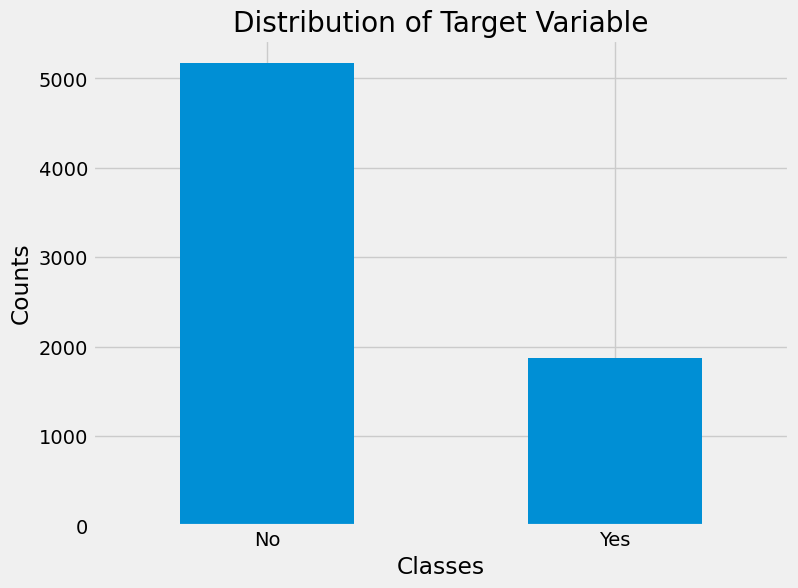

Class Frequencies:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [5]:

target_variable = 'Churn'
class_counts = data_[target_variable].value_counts()

# Visualize the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

# Calculate class frequencies
class_frequencies = data_[target_variable].value_counts(normalize=True)
print("Class Frequencies:")
print(class_frequencies)


In [6]:
# Display information about the dataset including attributes and types
print("Attributes and Types:")
print(data_.info())


Attributes and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

 Attributes analysis:

Data Types of Columns:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


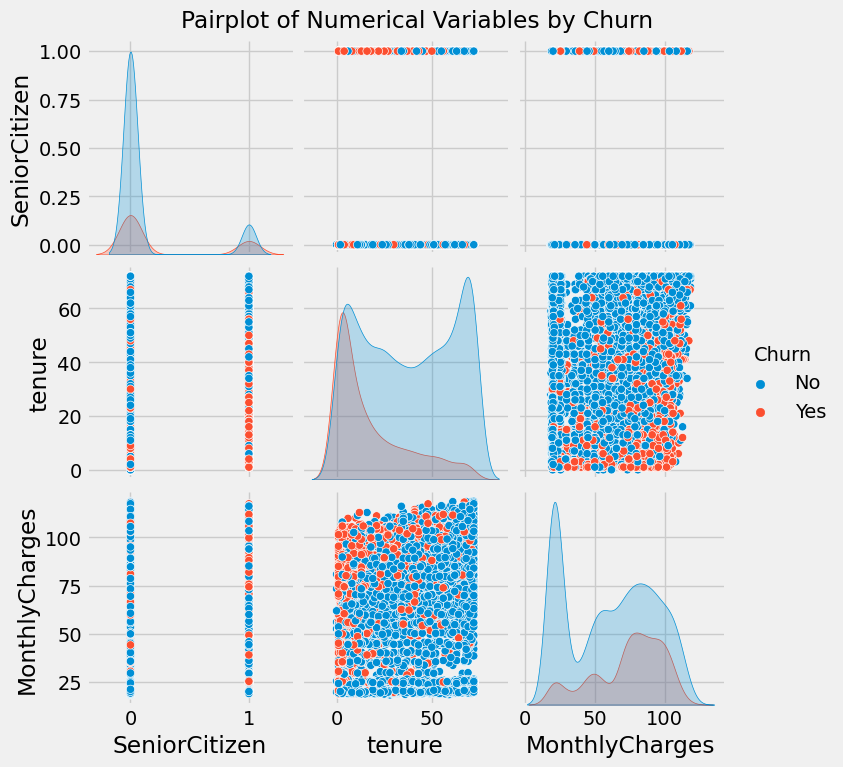

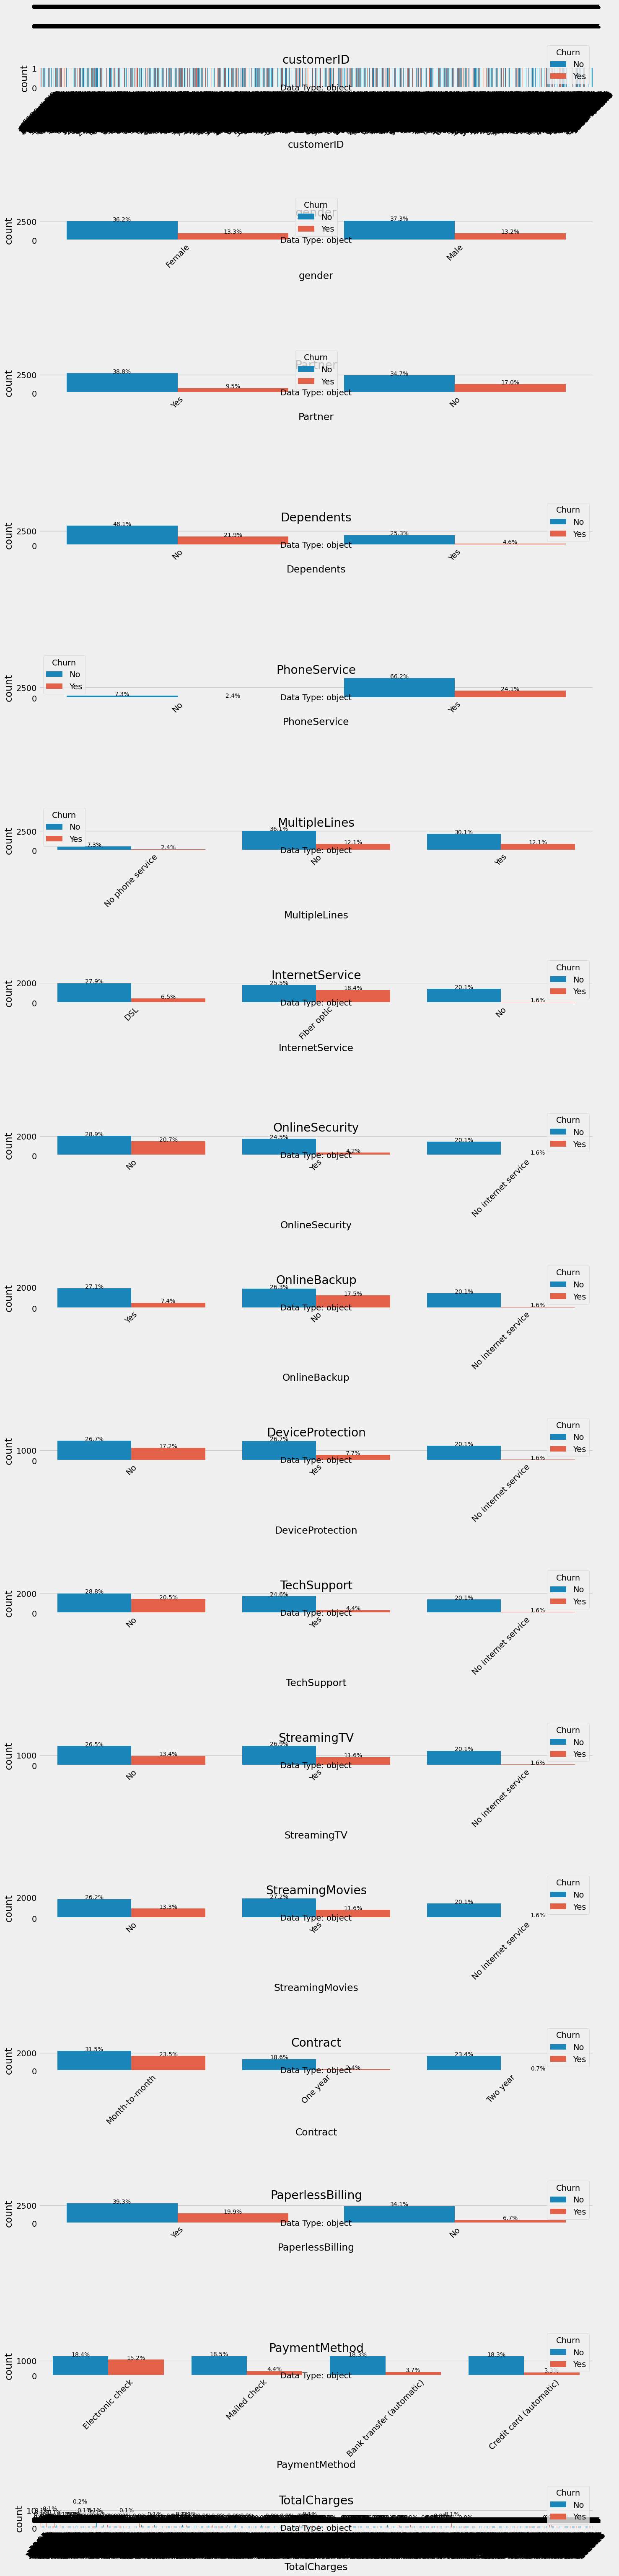

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print data types of each column
print("Data Types of Columns:")
print(data_.dtypes)

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data_, hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Churn', y=1.02)

# Add data types annotations to pairplot


plt.show()

# Countplot for categorical variables with Churn
cat_columns = [col for col in data_.columns if data_[col].dtype == 'object' and col != 'Churn']
num_plots = len(cat_columns)
plt.figure(figsize=(15, 4 * num_plots))
for i, col in enumerate(cat_columns):
    plt.subplot(num_plots, 1, i + 1)
    sns.countplot(data=data_, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(col)
    
    # Add percentage text annotations
    total = len(data_[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height + 3, '{:.1f}%'.format((height / total) * 100), 
                       ha='center', color='black', fontsize=10)

# Add data types annotations to countplot
for ax, col in zip(plt.gcf().axes, cat_columns):
    ax.text(0.5, -0.1, f'Data Type: {data_[col].dtype}', transform=ax.transAxes, ha='center')

plt.tight_layout()
plt.show()


In [10]:
data = data_.iloc[:, 1:].copy()
data.head()

#  this line of code creates a new DataFrame data that contains 
#  all rows and columns of data_, except for the first column. 
#  It's essentially removing the first column from the original data
#  and storing the modified data in a new variable.








,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Assessment of data quality

In [40]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found in the dataset.")
    else:
        print("Missing Values:")
        print(missing_values)
check_missing_values(data_)
        

No missing values found in the dataset.


In [11]:
data.shape

#a tuple like (num_rows, num_columns)

(7043, 20)

## Checking for duplicate and missing values

In [12]:
data.duplicated().sum()

22

In [14]:
data.drop_duplicates(inplace=True)


# data.drop_duplicates(inplace=True) it will remove 
# any duplicate rows from the DataFrame data, modifying 
# it in place, and updating its contents to reflect the 
# removal of duplicates.







In [15]:
data.shape

(7021, 20)

In [16]:
data.isna().sum()

#Check that there is no duplicates anymore

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
data.info()


# The data.info() method :
# The total number of entries (rows) in the DataFrame.
# The number of columns in the DataFrame.
# The data type of each column.
# The number of non-null values in each column.

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [35]:
# Print columns considered as numeric
numeric_columns = data_.select_dtypes(include=np.number).columns
print("Numeric Columns:")
print(numeric_columns)

# Print columns considered as objects
object_columns = data_.select_dtypes(include='object').columns
print("\nObject Columns:")
print(object_columns)


Numeric Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Object Columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [12]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

#This line of code is used to convert the values in the "TotalCharges" 
# column of the DataFrame data to numeric data type.
#errors='coerce': This parameter specifies how errors should be handled during conversion.
# When errors='coerce', it means that if any errors occur during conversion 
# (such as encountering non-numeric values), those
# problematic values will be set to NaN (Not a Number), effectively converting them to missing values.

In [13]:
data.TotalCharges.fillna(data.TotalCharges.mean(), inplace=True)

#This line of code is filling missing values (NaN) in the "TotalCharges" column of
# the DataFrame data with the mean of the non-missing values in the same column. Let's 

Checking outdated and wrong values

In [37]:
# Check for wrong values in numeric columns (e.g., values outside expected ranges)
numeric_columns = data.select_dtypes(include=np.number).columns
for col in numeric_columns:
    # Add your validation criteria here (e.g., range checks)
    wrong_values = data[(data[col] < 0) | (data[col] > 100000)]  # Example: Checking for values outside [0, 100] range
    if not wrong_values.empty:
        print(f"Wrong values found in {col}:")
        print(wrong_values)

# Assess the temporal relevance of date-related attributes
date_columns = data.select_dtypes(include='datetime64').columns
for col in date_columns:
    # Check for outdated data (e.g., dates older than a certain threshold)
    outdated_data = data[data[col] < pd.Timestamp('2015-01-01')]  # Example: Consider data older than 2015
    if not outdated_data.empty:
        print(f"Outdated data found in {col}:")
        print(outdated_data)
    else:
     print("No outdated data")   


Correlation Analysis

Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


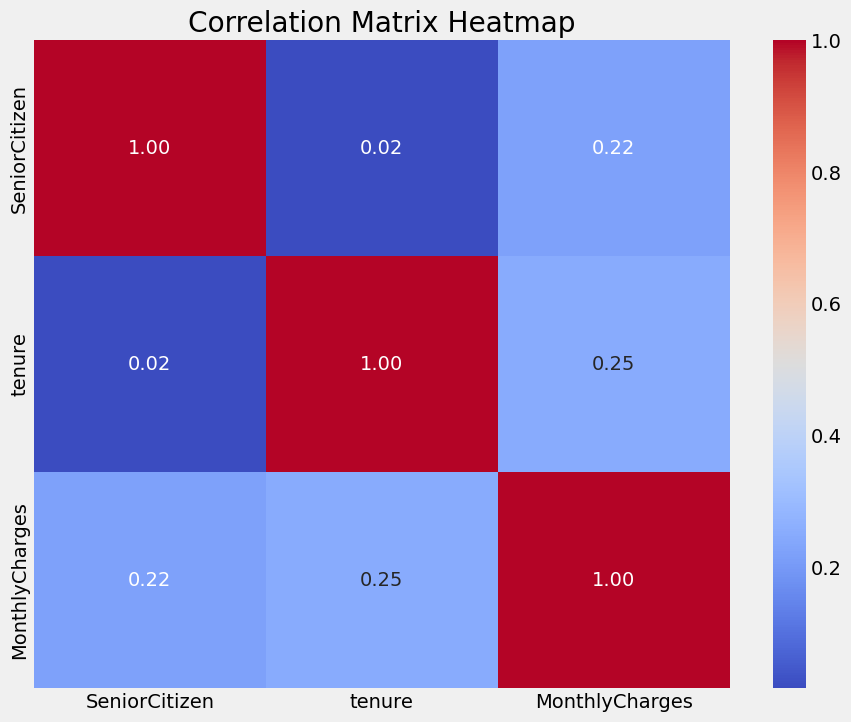

In [43]:

# Assuming 'data_' is your DataFrame
# Select only numeric columns
numeric_data = data_.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


## Plot data distribution for numeric columns

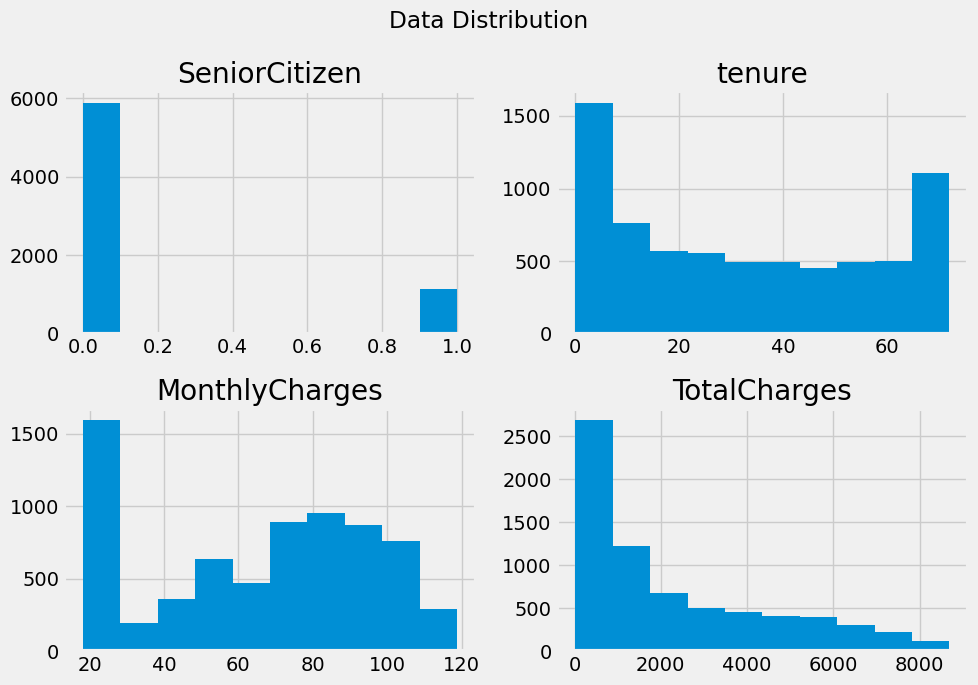

In [14]:
data.hist()
plt.suptitle('Data Distribution')
plt.tight_layout();



# The x-axis represents the range of values 
# for the variable being plotted. Each bar 
# (or bin) on the x-axis represents a specific range of values.
# The y-axis represents the frequency or count of observations falling within each bin ( How many times the value on x-axis occured).

## Plot class distribution

In [15]:
data.Churn.value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

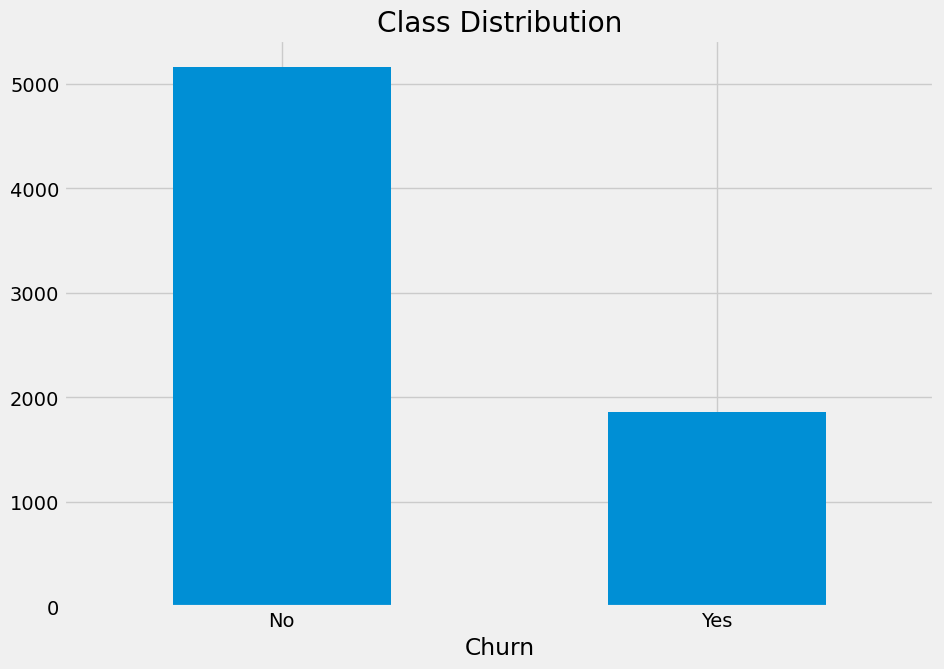

In [16]:
data.Churn.value_counts().plot(kind='bar', title='Class Distribution', rot=0);

## Analyse numeric and catgorical features

In [18]:
numeric_data = data.select_dtypes(include=np.number)
#  The parameter include=np.number specifies 
# that only columns with numeric data types should be included.
categorical_data = data.select_dtypes(include=object)
# The parameter include=object specifies that only columns with object data types

In [19]:
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [20]:
for col in categorical_data.columns:
  print(f'{col}: {categorical_data[col].unique()}\n{categorical_data[col].value_counts()}\n{"--"*20}\n')
  
# when you run this code, it will iterate over each column in categorical_data,
# printing out the unique values and their 
# respective counts for each column, along with a separator line between each column's information  

gender: ['Female' 'Male']
gender
Male      3541
Female    3480
Name: count, dtype: int64
----------------------------------------

Partner: ['Yes' 'No']
Partner
No     3619
Yes    3402
Name: count, dtype: int64
----------------------------------------

Dependents: ['No' 'Yes']
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
----------------------------------------

PhoneService: ['No' 'Yes']
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
----------------------------------------

MultipleLines: ['No phone service' 'No' 'Yes']
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

InternetService: ['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
----------------------------------------

OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineSecurity
No                     3490
Y

# Transforming numeric and categorical features

Preprocessing part

Check for outliers and validtiy test

In [48]:

# Sample DataFrame (replace this with your actual DataFrame)

# Checking for outliers and handling them
def handle_outliers(df, col, threshold):
    outlier_indices = df.index[(df[col] < 0) | (df[col] > threshold)]
    if len(outlier_indices) > 0:
        print(f"Outliers detected in column '{col}':")
        print(df.loc[outlier_indices])
        # Handling outliers (e.g., replacing them with NaN)
        df.loc[outlier_indices, col] = pd.NA
    else:
        print(f"No outliers detected in column '{col}'.")

# Handle outliers in numerical columns (e.g., threshold = 100000 for MonthlyCharges)
numeric_columns = data_.select_dtypes(include='number').columns
for col in numeric_columns:
    handle_outliers(data_, col, 10000)  # Adjust the threshold as needed

# Validity tests of attributes
def validity_tests(df, col, threshold):
    invalid_indices = df.index[df[col] >= threshold]
    if len(invalid_indices) > 0:
        print(f"Invalid values detected in column '{col}':")
        print(df.loc[invalid_indices])
        # Handle invalid values here (e.g., replace them with a default value)
    else:
        print(f"All values in column '{col}' are valid.")

# Perform validity tests on the 'Height' column (e.g., threshold = 9000)
# Replace 'Height' with the appropriate column name and adjust the threshold as needed
#validity_tests(data_, 'Height', 9000)


No outliers detected in column 'SeniorCitizen'.
No outliers detected in column 'tenure'.
No outliers detected in column 'MonthlyCharges'.


In [22]:
data['Churn'] = data['Churn'].apply(lambda x: 0 if x == 'No' else 1)

#converts the values in the "Churn" column to binary numerical values. 

In [23]:
numeric_columns = data.iloc[:, :-1].select_dtypes(include=np.number).columns
cat_columns = data.iloc[:, :-1].select_dtypes(include=object).columns

#Last column is the target varaible we dont select it 

In [26]:
print(f'Numeric Columns: {numeric_columns}\n\nCategorical Columns: {cat_columns}')

Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [27]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# creating copies of X and y, the original data DataFrame remains intact.
# This is crucial because if any modifications or preprocessing steps are applied to the training or
# testing datasets, you still have the original data to reference.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

len(X_train), len(X_test), len(y_train), len(y_test)

(5616, 1405, 5616, 1405)

In [31]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [33]:
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns),
    (MinMaxScaler(), numeric_columns),
    remainder='passthrough'
)

# this code snippet creates a ColumnTransformer object that applies OneHotEncoder to categorical
# columns (cat_columns), MinMaxScaler to numeric columns (numeric_columns)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)
#This fits the transformer to the training data (X_train) (X-test) and transforms it.

## Fitting data to ML models

In [34]:
# evaluation function
from sklearn.metrics import precision_recall_fscore_support
from typing import Any

def evaluate(y_true: Any, y_pred: Any) -> dict[str, float]:
  accuracy = sum(y_true == y_pred) / len(y_true)
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='binary')
  return {'accuracy': round(accuracy*100, 2),
          'precision': round(precision*100, 2),
          'recall': round(recall*100, 2),
          'f1-score': round(f1_score*100, 2)}

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_transformed, y_train)

lr_test_preds = lr.predict(X_test_transformed)

lr_train_score = evaluate(y_train, lr.predict(X_train_transformed))
lr_test_score = evaluate(y_test, lr_test_preds)

In [36]:
# scores
print(f"""
--- Logistic Regression ---
Train Score: {lr_train_score}
Test Score: {lr_test_score}""")


--- Logistic Regression ---
Train Score: {'accuracy': 74.06, 'precision': 50.6, 'recall': 79.87, 'f1-score': 61.95}
Test Score: {'accuracy': 75.94, 'precision': 52.87, 'recall': 84.14, 'f1-score': 64.94}


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_transformed, y_train)

dt_test_preds = dt.predict(X_test_transformed)

dt_train_score = evaluate(y_train, dt.predict(X_train_transformed))
dt_test_score = evaluate(y_test, dt_test_preds)

In [38]:
# scores
print(f"""
--- Decision Tree ---
Train Score: {dt_train_score}
Test Score: {dt_test_score}""")


--- Decision Tree ---
Train Score: {'accuracy': 99.77, 'precision': 99.13, 'recall': 100.0, 'f1-score': 99.56}
Test Score: {'accuracy': 74.95, 'precision': 52.69, 'recall': 52.69, 'f1-score': 52.69}


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_transformed, y_train)

rf_test_preds = rf.predict(X_test_transformed)

rf_train_score = evaluate(y_train, rf.predict(X_train_transformed))
rf_test_score = evaluate(y_test, rf_test_preds)

In [48]:
# scores
print(f"""
--- Random Forest ---
Train Score: {rf_train_score}
Test Score: {rf_test_score}""")


--- Random Forest ---
Train Score: {'accuracy': 99.75, 'precision': 99.2, 'recall': 99.87, 'f1-score': 99.53}
Test Score: {'accuracy': 79.57, 'precision': 64.03, 'recall': 52.15, 'f1-score': 57.48}


In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

knn_test_preds = knn.predict(X_test_transformed)

knn_train_score = evaluate(y_train, knn.predict(X_train_transformed))
knn_test_score = evaluate(y_test, knn_test_preds)

In [50]:
# scores
print(f"""
--- Random Forest ---
Train Score: {knn_train_score}
Test Score: {knn_test_score}""")


--- Random Forest ---
Train Score: {'accuracy': 83.89, 'precision': 71.77, 'recall': 64.38, 'f1-score': 67.87}
Test Score: {'accuracy': 77.08, 'precision': 56.94, 'recall': 55.11, 'f1-score': 56.01}


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support

xgb = XGBClassifier()
xgb.fit(X_train_transformed, y_train)

xgb_test_preds = xgb.predict(X_test_transformed)

xgb_train_score = evaluate(y_train, xgb.predict(X_train_transformed))
xgb_test_score = evaluate(y_test, xgb_test_preds)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# scores
print(f"""
--- XGBoost ---
Train Score: {xgb_train_score}
Test Score: {xgb_test_score}""")


--- XGBoost ---
Train Score: {'accuracy': 94.09, 'precision': 91.21, 'recall': 85.93, 'f1-score': 88.49}
Test Score: {'accuracy': 78.29, 'precision': 59.71, 'recall': 55.38, 'f1-score': 57.46}


## Defining model parameters for cross validation

In [ ]:
# Parameter grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Parameter grid for Decision Tree Classifier
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for K-Nearest Neighbors Classifier
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameter grid for XGBoost Classifier
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, class_weight='balanced'), lr_params),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), dt_params),
    'Random Forest': (RandomForestClassifier(class_weight='balanced'), rf_params),
    'KNN': (KNeighborsClassifier(), knn_params),
    'XGBoost': (XGBClassifier(), xgb_params)
}

### Use over sampling to balance the data

In [ ]:
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

sampled_models = {}
sampled_scores = {}

sampler = SMOTEENN()
X_train_resample, y_train_resample = sampler.fit_resample(X_train_transformed, y_train)

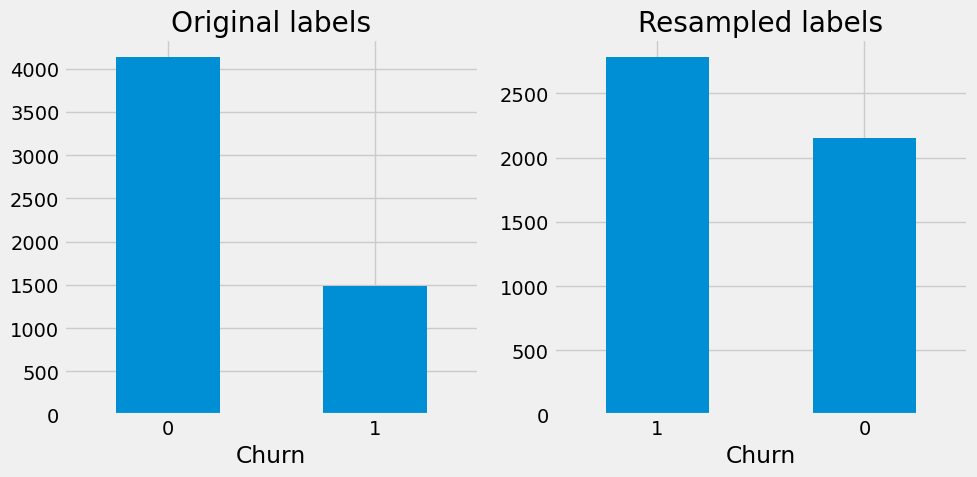

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Original labels', rot=0)

plt.subplot(1, 2, 2)
y_train_resample.value_counts().plot(kind='bar', title='Resampled labels', rot=0)
plt.tight_layout();

In [ ]:
for clf_name, (model, _) in classifiers.items():
  model.fit(X_train_resample, y_train_resample)
  preds = model.predict(X_test_transformed)

  sampled_models[clf_name] = model
  sample_train_score = evaluate(y_train_resample, model.predict(X_train_resample))
  sample_test_score = evaluate(y_test, preds)
  sampled_scores[clf_name] = sample_test_score
  print(f'{clf_name} train score: {sample_train_score}')
  print(f'{clf_name} test score: {sample_test_score}\n')

Logistic Regression train score: {'accuracy': 90.68, 'precision': 92.07, 'recall': 91.34, 'f1-score': 91.7}
Logistic Regression test score: {'accuracy': 72.74, 'precision': 49.18, 'recall': 88.17, 'f1-score': 63.14}

Decision Tree train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Decision Tree test score: {'accuracy': 72.6, 'precision': 48.89, 'recall': 77.15, 'f1-score': 59.85}

Random Forest train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Random Forest test score: {'accuracy': 74.66, 'precision': 51.33, 'recall': 82.8, 'f1-score': 63.37}

KNN train score: {'accuracy': 97.39, 'precision': 95.73, 'recall': 99.82, 'f1-score': 97.73}
KNN test score: {'accuracy': 66.26, 'precision': 43.38, 'recall': 89.78, 'f1-score': 58.49}

XGBoost train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
XGBoost test score: {'accuracy': 75.37, 'precision': 52.26, 'recall': 80.65, 'f1-score': 6

## Feature Extraction

In [ ]:
data_fex = data.copy()
data_fex = pd.get_dummies(data_fex, drop_first=True)
data_corr = data_fex.corr()['Churn'].sort_values(ascending=False)

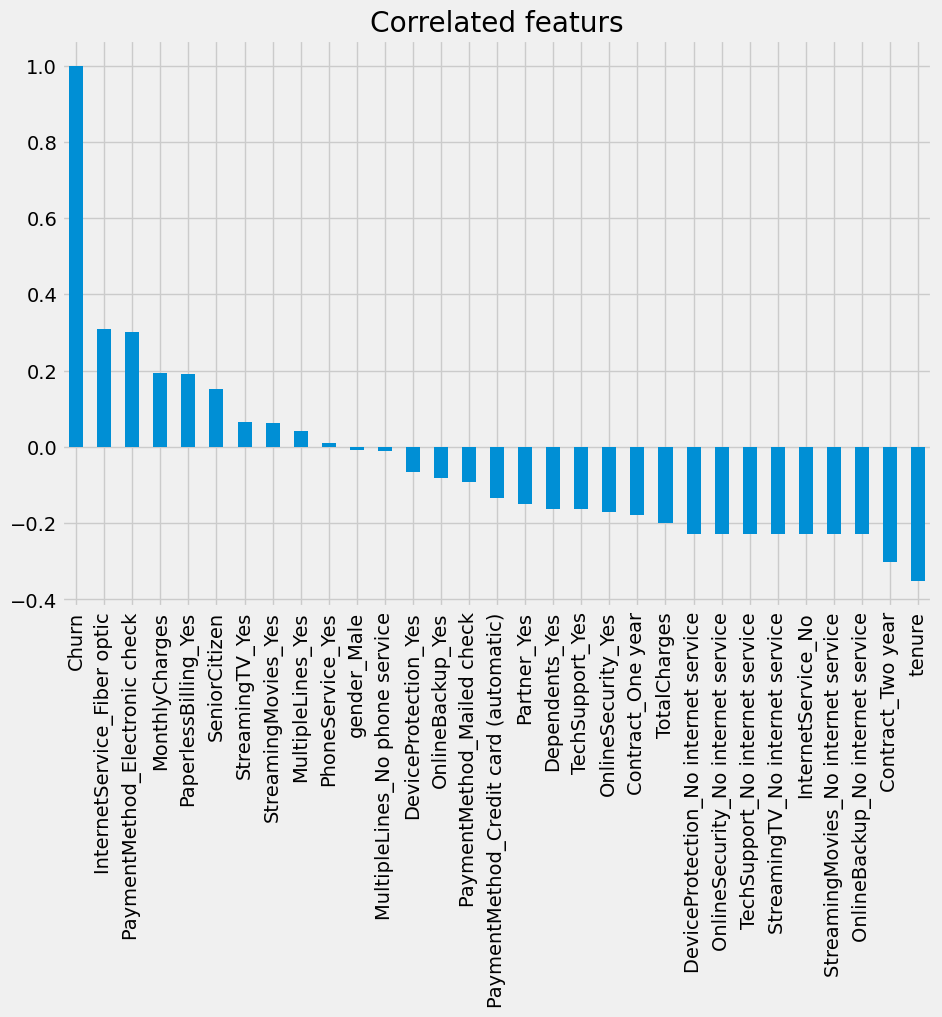

In [ ]:
data_corr[abs(data_corr) > 0.0].plot(kind='bar', title='Correlated features');

## Using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_transformed)

# Evaluate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

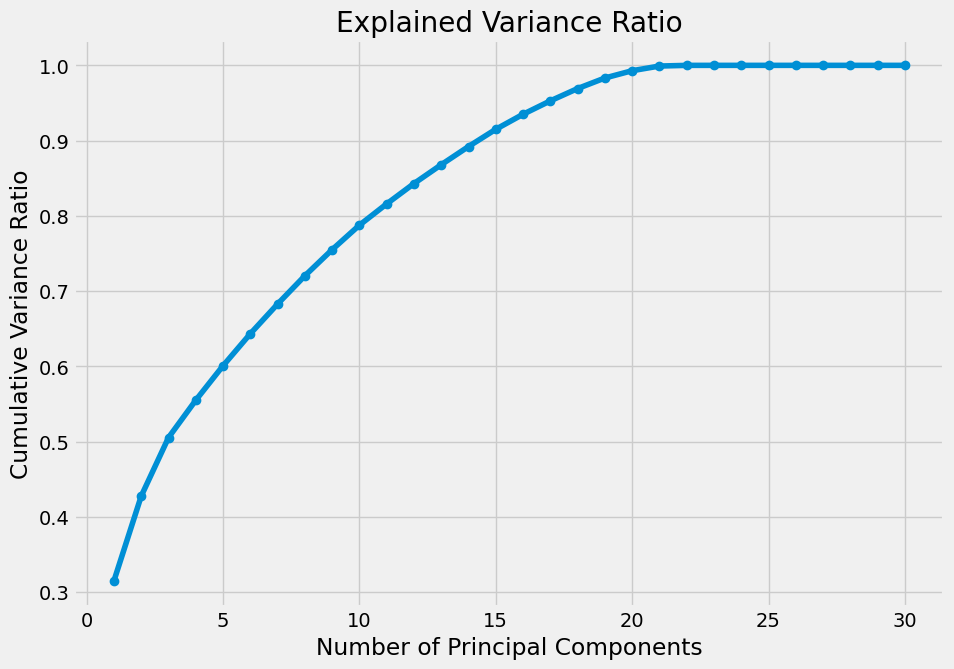

In [ ]:
# Plot explained variance ratio
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio');

In [ ]:
# Select number of principal components based on explained variance ratio
# Choose the number of components that explain a significant portion of the variance (e.g., 95%)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

17

In [ ]:
# Use selected number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resample)
X_test_pca = pca.transform(X_test_transformed)

In [ ]:
fex_models = {}
fex_scores = {}
for clf_name, (model, _) in classifiers.items():
  model.fit(X_train_pca, y_train_resample)
  preds = model.predict(X_test_pca)

  fex_models[clf_name] = model
  fex_train_score = evaluate(y_train_resample, model.predict(X_train_pca))
  fex_test_score = evaluate(y_test, preds)
  fex_scores[clf_name] = fex_test_score
  print(f'{clf_name} train score: {fex_train_score}')
  print(f'{clf_name} test score: {fex_test_score}\n')

Logistic Regression train score: {'accuracy': 89.5, 'precision': 91.43, 'recall': 89.79, 'f1-score': 90.61}
Logistic Regression test score: {'accuracy': 70.82, 'precision': 47.25, 'recall': 87.9, 'f1-score': 61.47}

Decision Tree train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Decision Tree test score: {'accuracy': 68.47, 'precision': 44.48, 'recall': 76.88, 'f1-score': 56.35}

Random Forest train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Random Forest test score: {'accuracy': 72.38, 'precision': 48.77, 'recall': 84.95, 'f1-score': 61.96}

KNN train score: {'accuracy': 96.9, 'precision': 95.03, 'recall': 99.71, 'f1-score': 97.32}
KNN test score: {'accuracy': 66.05, 'precision': 43.24, 'recall': 90.32, 'f1-score': 58.49}

XGBoost train score: {'accuracy': 99.98, 'precision': 99.96, 'recall': 100.0, 'f1-score': 99.98}
XGBoost test score: {'accuracy': 72.24, 'precision': 48.58, 'recall': 82.8, 'f1-score': 61

## Cross Validation

In [ ]:
X_train_pca.shape, y_train_resample.shape

((4935, 17), (4935,))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

trained_models = {}
best_acc = 0.0
best_model = None

# kf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=123)
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)

for clf_name_, (_, params) in classifiers.items():
  for clf_name, clf in fex_models.items():
    if clf_name_ == clf_name:
      for train_idx, val_idx in kf.split(X_train_pca, y_train_resample):
        random_search = RandomizedSearchCV(clf, params, scoring='f1',
                                         cv=kf, error_score='raise', n_jobs=-1)

        random_search.fit(X_train_pca[train_idx], y_train_resample[train_idx])

        preds = random_search.best_estimator_.predict(X_train_pca[val_idx])
        acc = np.mean(y_train_resample[val_idx] == preds)

      trained_models[clf_name] = random_search

      if acc > best_acc:
        best_acc = acc
        best_model = random_search
      print(f'Random Search scores for {clf_name}:')
      print(f'Accuracy: {acc*100:.2f}%')
      means = random_search.cv_results_['mean_test_score']

      print(f'Best mean f1-score: {max(means)*100:.2f}%')
      print(f'Best parameters: {random_search.best_params_}\n')

print(f'Best test accuracy: {best_acc*100:.2f}%\nBest model: {best_model.best_estimator_}')

Random Search scores for Logistic Regression:
Accuracy: 89.14%
Best mean f1-score: 90.61%
Best parameters: {'C': 0.01}

Random Search scores for Decision Tree:
Accuracy: 90.51%
Best mean f1-score: 90.00%
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}

Random Search scores for Random Forest:
Accuracy: 93.68%
Best mean f1-score: 93.31%
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Random Search scores for KNN:
Accuracy: 93.80%
Best mean f1-score: 93.58%
Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'ball_tree'}

Random Search scores for XGBoost:
Accuracy: 93.47%
Best mean f1-score: 93.41%
Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Best test accuracy: 93.80%
Best model: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')


In [ ]:
# rangom search test scores
cv_test_scores = {}
print('Test Score:')
for clf_name, model in trained_models.items():
  preds = model.best_estimator_.predict(X_test_pca)
  score = evaluate(y_test, preds)
  cv_test_scores[clf_name] = score
  print(f'{clf_name}: {score}')

Test Score:
Logistic Regression: {'accuracy': 69.54, 'precision': 46.09, 'recall': 88.71, 'f1-score': 60.66}
Decision Tree: {'accuracy': 67.9, 'precision': 44.02, 'recall': 78.23, 'f1-score': 56.34}
Random Forest: {'accuracy': 71.96, 'precision': 48.35, 'recall': 86.56, 'f1-score': 62.04}
KNN: {'accuracy': 65.41, 'precision': 42.62, 'recall': 88.44, 'f1-score': 57.52}
XGBoost: {'accuracy': 71.53, 'precision': 47.89, 'recall': 85.48, 'f1-score': 61.39}


## Ensemble Model

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [(k, v.best_estimator_) for k, v in trained_models.items()]
final_estimator = LogisticRegression(max_iter=1000)

ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
ensemble.fit(X_train_pca, y_train_resample)
ensemble_preds = ensemble.predict(X_test_pca)

# Evaluate the Ensemble model
train_score_en = evaluate(y_train_resample, ensemble.predict(X_train_pca))
test_score_en = evaluate(y_test, ensemble_preds)

In [ ]:
# scores
print(f"""
--- Ensemble Model ---
Train Score: {train_score_en}
Test Score: {test_score_en}""")


--- Ensemble Model ---
Train Score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Test Score: {'accuracy': 71.03, 'precision': 47.26, 'recall': 81.18, 'f1-score': 59.74}


# Deep learning

In [ ]:
import torch
from torch import nn

class ClfModel(nn.Module):
  def __init__(self, input_dim: int) -> None:
    super(ClfModel, self).__init__()
    self.layer_1 = nn.Linear(in_features=input_dim, out_features=64)
    self.layer_2 = nn.Linear(in_features=64, out_features=128)
    self.layer_3 = nn.Linear(in_features=128, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.relu(self.layer_1(x))
    x = self.relu(self.layer_2(x))
    return self.layer_3(x)

In [ ]:
X_train_tensor = torch.from_numpy(X_train_resample).type(torch.float)
y_train_tensor = torch.from_numpy(y_train_resample.to_numpy().reshape(-1, 1)).type(torch.float)

X_test_tensor = torch.from_numpy(X_test_transformed).type(torch.float)
y_test_tensor = torch.from_numpy(y_test.to_numpy().reshape(-1, 1)).type(torch.float)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
nn_model = ClfModel(input_dim=X_train_tensor.shape[-1]).to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.01)

In [ ]:
epochs = 200

for epoch in range(epochs):
  train_loss, train_correct = 0.0, 0.0
  nn_model.train()
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    y_logits = nn_model(inputs)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, targets)
    train_correct += torch.eq(targets, y_pred).sum().item()
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses = train_loss / len(train_loader)
  train_accuracy = train_correct / len(train_loader.dataset)

  test_loss, test_correct = 0.0, 0.0
  nn_model.eval()
  with torch.inferance_mode():
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      test_logits = nn_model(inputs)
      test_pred = torch.round(torch.sigmoid(test_logits))

      loss_test = loss_fn(test_logits, targets)
      test_correct += torch.eq(targets, test_pred).sum().item()
      test_loss += loss_test.item()

  test_losses = test_loss / len(test_loader)
  test_accuracy = test_correct / len(test_loader.dataset)

  if epoch % 25 == 0:
      print(f'Epoch: {epoch+1} | Loss: {train_losses:.5f} | Accuracy: {train_accuracy*100:.2f}% | Test loss: {test_losses:.5f} | Test Accuracy: {test_accuracy*100:.2f}%')


Epoch: 1 | Loss: 0.27145 | Accuracy: 88.65% | Test loss: 0.88249 | Test Accuracy: 66.98%
Epoch: 26 | Loss: 0.04455 | Accuracy: 98.30% | Test loss: 2.48150 | Test Accuracy: 72.74%
Epoch: 51 | Loss: 0.01405 | Accuracy: 99.35% | Test loss: 3.75722 | Test Accuracy: 73.59%
Epoch: 76 | Loss: 0.01167 | Accuracy: 99.41% | Test loss: 3.77783 | Test Accuracy: 73.45%
Epoch: 101 | Loss: 0.01195 | Accuracy: 99.64% | Test loss: 3.53041 | Test Accuracy: 72.88%
Epoch: 126 | Loss: 0.06211 | Accuracy: 97.49% | Test loss: 2.54394 | Test Accuracy: 74.66%
Epoch: 151 | Loss: 0.00643 | Accuracy: 99.72% | Test loss: 4.75449 | Test Accuracy: 73.59%
Epoch: 176 | Loss: 0.00463 | Accuracy: 99.74% | Test loss: 4.55898 | Test Accuracy: 74.16%


In [ ]:
nn_model_preds = []

nn_model.eval()
with torch.inference_mode():
  for inputs, _ in test_loader:
    inputs = inputs.to(device)
    test_logits = nn_model(inputs).squeeze()
    nn_model_preds.append(torch.round(torch.sigmoid(test_logits)))

In [ ]:
nn_model_preds = torch.cat(nn_model_preds)
nn_model_preds[:10]

tensor([0., 1., 0., 1., 1., 0., 0., 1., 0., 0.])

In [ ]:
nn_model_result = evaluate(y_test, nn_model_preds.numpy())
print(f'Torch model results: {nn_model_result}')

Torch model results: {'accuracy': 73.24, 'precision': 49.67, 'recall': 81.99, 'f1-score': 61.87}


# Error Analysis

## Comparing all models' test scores

In [ ]:
scores_df = pd.DataFrame(fex_scores)
scores_df['NN Model'] = nn_model_result
scores_df['Ensemble Model'] = test_score_en
scores_df = scores_df.T
scores_df

,accuracy,precision,recall,f1-score
Logistic Regression,70.82,47.25,87.90,61.47
Decision Tree,68.47,44.48,76.88,56.35
Random Forest,72.38,48.77,84.95,61.96
KNN,66.05,43.24,90.32,58.49
XGBoost,72.24,48.58,82.80,61.23
NN Model,73.24,49.67,81.99,61.87
Ensemble Model,71.03,47.26,81.18,59.74


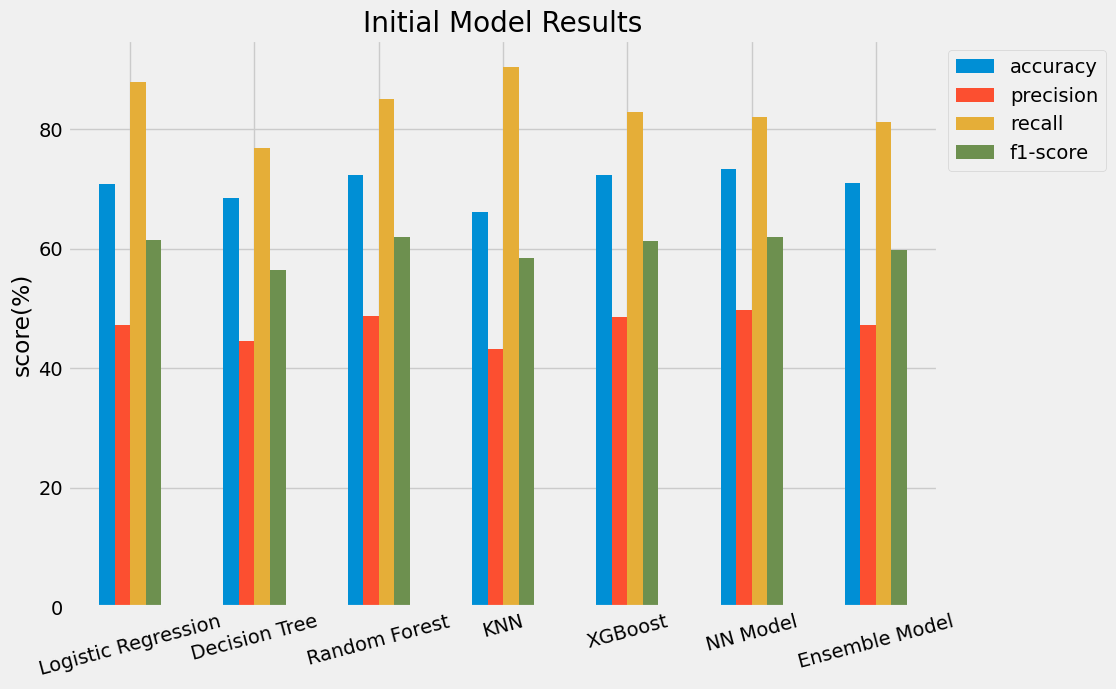

In [ ]:
scores_df.plot(kind='bar', title='Initial Model Results', ylabel='score(%)', rot=15).legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
scores_df_cv = pd.DataFrame(cv_test_scores).T
scores_df_cv

,accuracy,precision,recall,f1-score
Logistic Regression,69.54,46.09,88.71,60.66
Decision Tree,67.90,44.02,78.23,56.34
Random Forest,71.96,48.35,86.56,62.04
KNN,65.41,42.62,88.44,57.52
XGBoost,71.53,47.89,85.48,61.39


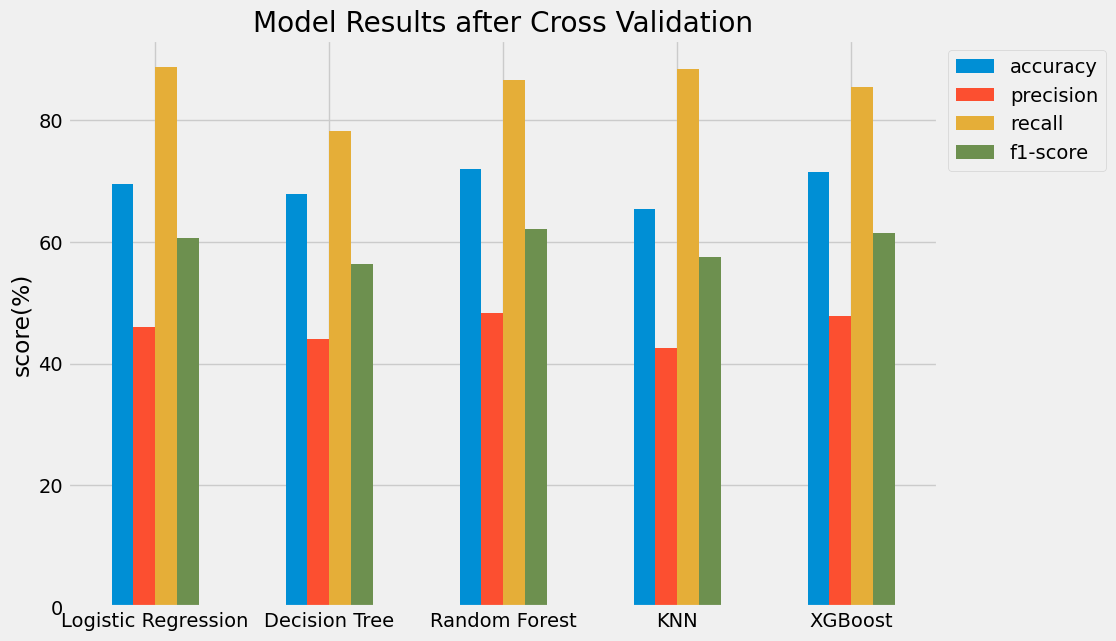

In [ ]:
scores_df_cv.plot(kind='bar', title='Model Results after Cross Validation', ylabel='score(%)', rot=0).legend(bbox_to_anchor=(1.0, 1.0));

## Comparing f1-scores

In [ ]:
scores_df.sort_values('f1-score', ascending=False)['f1-score']

Random Forest          61.96
NN Model               61.87
Logistic Regression    61.47
XGBoost                61.23
Ensemble Model         59.74
KNN                    58.49
Decision Tree          56.35
Name: f1-score, dtype: float64

In [ ]:
scores_df_cv.sort_values('f1-score', ascending=False)['f1-score']

Random Forest          62.04
XGBoost                61.39
Logistic Regression    60.66
KNN                    57.52
Decision Tree          56.34
Name: f1-score, dtype: float64

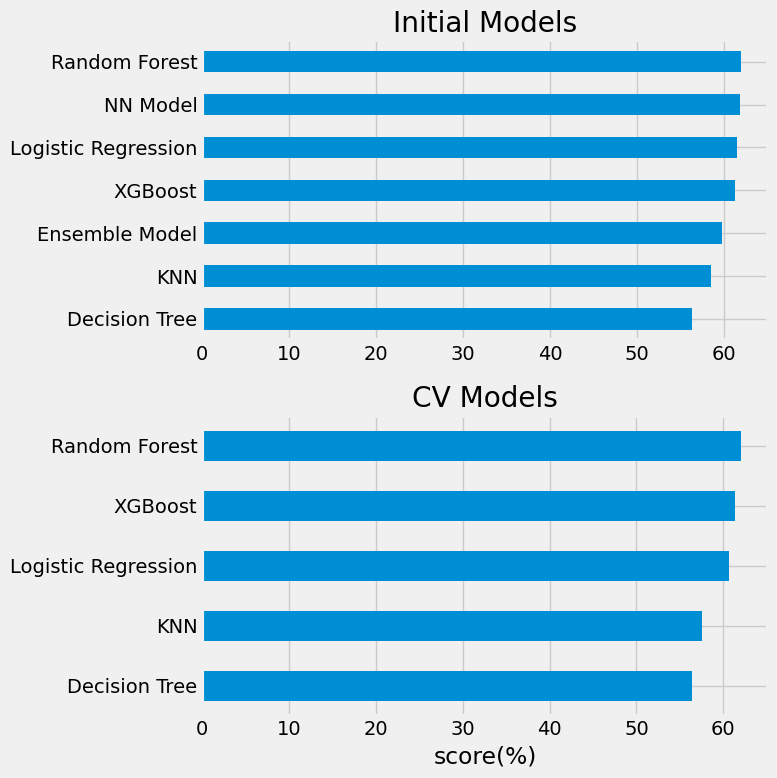

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
scores_df.sort_values('f1-score', ascending=True)['f1-score'].plot(kind='barh',
                                                                    title='Initial Models')
plt.subplot(2, 1, 2)
scores_df_cv.sort_values('f1-score', ascending=True)['f1-score'].plot(kind='barh',
                                                                       xlabel='f1-score(%)',
                                                                       title='CV Models')
plt.tight_layout();

## Random Forest model is the best performing model

### Plot confusion matrix for the best performing model

In [ ]:
trained_models.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost'])

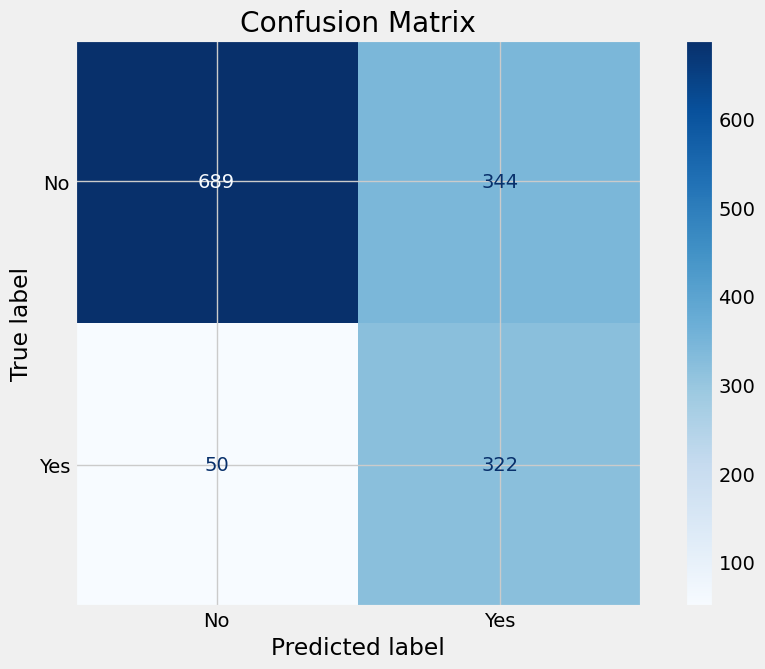

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_preds = trained_models['Random Forest'].best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test.to_numpy(), rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix');

## F1 scores for each class

In [ ]:
from sklearn.metrics import classification_report
clf_dict = classification_report(y_test.to_numpy(), rf_preds, output_dict=True, target_names=['No', 'Yes'])

In [ ]:
clf_dict

{'No': {'precision': 0.93234100135318,
  'recall': 0.6669893514036787,
  'f1-score': 0.7776523702031604,
  'support': 1033},
 'Yes': {'precision': 0.48348348348348347,
  'recall': 0.8655913978494624,
  'f1-score': 0.6204238921001927,
  'support': 372},
 'accuracy': 0.7195729537366548,
 'macro avg': {'precision': 0.7079122424183317,
  'recall': 0.7662903746265706,
  'f1-score': 0.6990381311516765,
  'support': 1405},
 'weighted avg': {'precision': 0.8134975873691749,
  'recall': 0.7195729537366548,
  'f1-score': 0.7360231930826593,
  'support': 1405}}

In [ ]:
f1_dict = {}
for k, v in clf_dict.items():
  if k == 'accuracy':
    break
  else:
    f1_dict[k] = v['f1-score']

f1_dict

{'No': 0.7776523702031604, 'Yes': 0.6204238921001927}

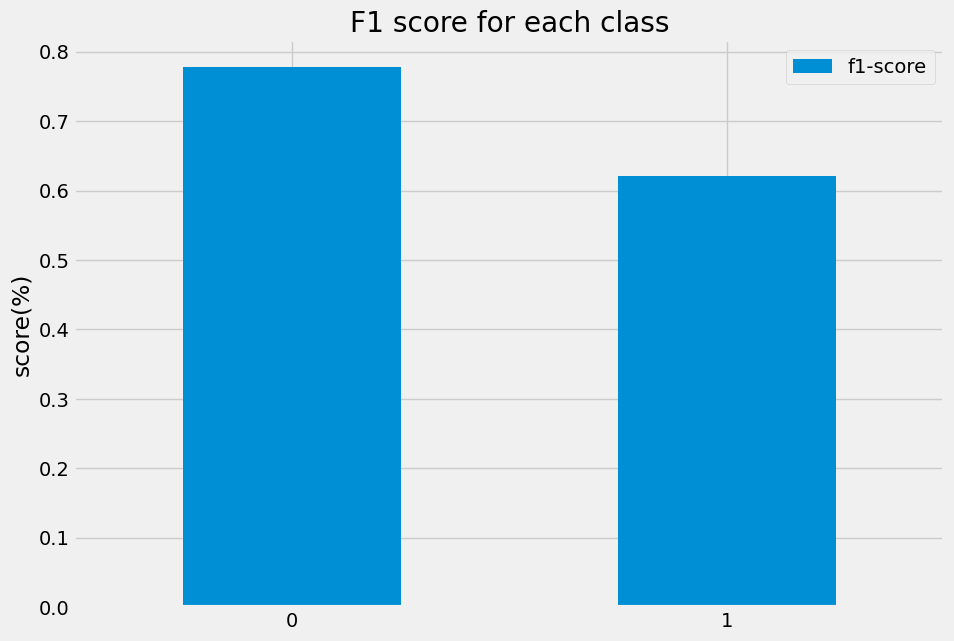

In [ ]:
pd.DataFrame({'class_name': f1_dict.keys(),
              'f1-score': f1_dict.values()}).plot(kind='bar',
                                                  title='F1 score for each class',
                                                  ylabel='f1-score(%)', rot=0);